In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Kannada_handwritten.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Kannada_handwritten/Hnd/Trj/Sample340/img340_014.m  
  inflating: Kannada_handwritten/Hnd/Trj/Sample340/img340_015.m  
  inflating: Kannada_handwritten/Hnd/Trj/Sample340/img340_016.m  
  inflating: Kannada_handwritten/Hnd/Trj/Sample340/img340_017.m  
  inflating: Kannada_handwritten/Hnd/Trj/Sample340/img340_018.m  
  inflating: Kannada_handwritten/Hnd/Trj/Sample340/img340_019.m  
  inflating: Kannada_handwritten/Hnd/Trj/Sample340/img340_020.m  
  inflating: Kannada_handwritten/Hnd/Trj/Sample340/img340_021.m  
  inflating: Kannada_handwritten/Hnd/Trj/Sample340/img340_022.m  
  inflating: Kannada_handwritten/Hnd/Trj/Sample340/img340_023.m  
  inflating: Kannada_handwritten/Hnd/Trj/Sample340/img340_024.m  
  inflating: Kannada_handwritten/Hnd/Trj/Sample340/img340_025.m  
   creating: Kannada_handwritten/Hnd/Trj/Sample341/
  inflating: Kannada_handwritten/Hnd/Trj/Sample341/img341_007.m  
  inflating: Kannada_handwritten/Hnd/Tr

In [ ]:
cp -r "/content/Kannada_handwritten" "/content/drive/MyDrive"


In [ ]:
import cv2
import os
import numpy as np
from sklearn.utils import shuffle
import pickle


def pickle_images_labels(image_dir):
    images_labels = []
    for g_id in os.listdir(image_dir):
        for i in range(25):
            img = cv2.imread(image_dir+"/"+g_id+"/"+"img"+g_id[-3:]+"-"+str(i).zfill(3)+".png", 0)
            if np.any(img == None):
                continue
            images_labels.append((np.array(img, dtype=np.float32), int(g_id[-3:])))
    return images_labels


def split_images_labels(images_labels):
    images = []
    labels = []
    for (image, label) in images_labels:
        images.append(image)
        labels.append(label)
    return images, labels


def create_pickle(image_dir):

    images_labels = pickle_images_labels(image_dir)
    images_labels = shuffle(shuffle(shuffle(images_labels)))
    images, labels = split_images_labels(images_labels)
    print("Length of images_labels", len(images_labels))

    train_images = images[:int(5/6*len(images))]
    print("Length of train_images", len(train_images))
    # with open("train_images", "wb") as f:
    #     pickle.dump(train_images, f)
    # del train_images

    train_labels = labels[:int(5/6*len(labels))]
    print("Length of train_labels", len(train_labels))
    # with open("train_labels", "wb") as f:
    #     pickle.dump(train_labels, f)
    # del train_labels

    test_images = images[int(5/6*len(images)):]
    print("Length of test_images", len(test_images))
    # with open("test_images", "wb") as f:
    #     pickle.dump(test_images, f)
    # del test_images

    test_labels = labels[int(5/6*len(labels)):]
    print("Length of test_labels", len(test_labels))
    # with open("test_labels", "wb") as f:
    #     pickle.dump(test_labels, f)
    # del test_labels

In [ ]:
def pickle_images_labels(image_dir):
    images_labels = []
 #   c=0
    for g_id in os.listdir(image_dir):
 #     c+=1
      for i in range(30):
        img = cv2.imread(image_dir+"/"+g_id+"/"+"img"+g_id[-3:]+"-"+str(i).zfill(3)+".png", 0)
        if np.any(img == None):
          continue
        img = cv2.resize(img, (64, 64))
        images_labels.append((np.array(img, dtype=np.float32), int(g_id[-3:])))
    return images_labels

In [ ]:
images_labels = pickle_images_labels('/content/Kannada_handwritten/Hnd/Img')

In [ ]:
len(images_labels)

16400

In [ ]:
images_labels = shuffle(shuffle(shuffle(images_labels)))

In [ ]:
def split_images_labels(images_labels):
    images = []
    labels = []
    for (image, label) in images_labels:
        images.append(image)
        labels.append(label)
    return images, labels

In [ ]:
images, labels = split_images_labels(images_labels)

In [ ]:
images[0].shape

(64, 64)

In [ ]:
print(labels)

[527, 407, 581, 188, 159, 113, 498, 587, 640, 650, 432, 597, 106, 527, 606, 95, 409, 362, 458, 352, 404, 256, 158, 298, 280, 64, 362, 214, 11, 532, 493, 480, 53, 322, 65, 548, 385, 307, 355, 327, 592, 210, 485, 641, 92, 45, 365, 404, 600, 338, 311, 513, 260, 586, 78, 50, 86, 435, 249, 436, 142, 251, 572, 455, 341, 621, 255, 586, 574, 173, 218, 58, 540, 341, 187, 454, 12, 217, 487, 224, 443, 190, 80, 201, 298, 603, 500, 137, 571, 182, 484, 286, 524, 571, 430, 370, 569, 396, 265, 482, 466, 568, 87, 551, 417, 593, 243, 588, 646, 356, 353, 283, 53, 627, 33, 260, 37, 198, 50, 110, 412, 364, 256, 572, 92, 302, 22, 206, 549, 179, 88, 433, 79, 223, 196, 347, 541, 155, 128, 10, 111, 579, 598, 497, 302, 403, 394, 253, 52, 630, 243, 430, 66, 137, 37, 58, 194, 649, 627, 146, 362, 289, 147, 482, 533, 444, 136, 603, 23, 258, 318, 168, 487, 642, 93, 463, 131, 522, 646, 256, 193, 593, 310, 402, 228, 194, 438, 262, 176, 373, 570, 274, 355, 258, 351, 435, 54, 641, 610, 533, 351, 68, 417, 583, 243, 410, 

In [ ]:
len(images)

16400

In [ ]:
train_images = images[:int(5/6*len(images))]
print("Length of train_images", len(train_images))

Length of train_images 13666


In [ ]:
train_labels = labels[:int(5/6*len(labels))]
print("Length of train_labels", len(train_labels))


test_images = images[int(5/6*len(images)):]
print("Length of test_images", len(test_images))


test_labels = labels[int(5/6*len(labels)):]
print("Length of test_labels", len(test_labels))


Length of train_labels 13666
Length of test_images 2734
Length of test_labels 2734


In [ ]:
print(train_labels)

[527, 407, 581, 188, 159, 113, 498, 587, 640, 650, 432, 597, 106, 527, 606, 95, 409, 362, 458, 352, 404, 256, 158, 298, 280, 64, 362, 214, 11, 532, 493, 480, 53, 322, 65, 548, 385, 307, 355, 327, 592, 210, 485, 641, 92, 45, 365, 404, 600, 338, 311, 513, 260, 586, 78, 50, 86, 435, 249, 436, 142, 251, 572, 455, 341, 621, 255, 586, 574, 173, 218, 58, 540, 341, 187, 454, 12, 217, 487, 224, 443, 190, 80, 201, 298, 603, 500, 137, 571, 182, 484, 286, 524, 571, 430, 370, 569, 396, 265, 482, 466, 568, 87, 551, 417, 593, 243, 588, 646, 356, 353, 283, 53, 627, 33, 260, 37, 198, 50, 110, 412, 364, 256, 572, 92, 302, 22, 206, 549, 179, 88, 433, 79, 223, 196, 347, 541, 155, 128, 10, 111, 579, 598, 497, 302, 403, 394, 253, 52, 630, 243, 430, 66, 137, 37, 58, 194, 649, 627, 146, 362, 289, 147, 482, 533, 444, 136, 603, 23, 258, 318, 168, 487, 642, 93, 463, 131, 522, 646, 256, 193, 593, 310, 402, 228, 194, 438, 262, 176, 373, 570, 274, 355, 258, 351, 435, 54, 641, 610, 533, 351, 68, 417, 583, 243, 410, 

In [ ]:
from keras.utils import to_categorical
print(train_labels)

[527, 407, 581, 188, 159, 113, 498, 587, 640, 650, 432, 597, 106, 527, 606, 95, 409, 362, 458, 352, 404, 256, 158, 298, 280, 64, 362, 214, 11, 532, 493, 480, 53, 322, 65, 548, 385, 307, 355, 327, 592, 210, 485, 641, 92, 45, 365, 404, 600, 338, 311, 513, 260, 586, 78, 50, 86, 435, 249, 436, 142, 251, 572, 455, 341, 621, 255, 586, 574, 173, 218, 58, 540, 341, 187, 454, 12, 217, 487, 224, 443, 190, 80, 201, 298, 603, 500, 137, 571, 182, 484, 286, 524, 571, 430, 370, 569, 396, 265, 482, 466, 568, 87, 551, 417, 593, 243, 588, 646, 356, 353, 283, 53, 627, 33, 260, 37, 198, 50, 110, 412, 364, 256, 572, 92, 302, 22, 206, 549, 179, 88, 433, 79, 223, 196, 347, 541, 155, 128, 10, 111, 579, 598, 497, 302, 403, 394, 253, 52, 630, 243, 430, 66, 137, 37, 58, 194, 649, 627, 146, 362, 289, 147, 482, 533, 444, 136, 603, 23, 258, 318, 168, 487, 642, 93, 463, 131, 522, 646, 256, 193, 593, 310, 402, 228, 194, 438, 262, 176, 373, 570, 274, 355, 258, 351, 435, 54, 641, 610, 533, 351, 68, 417, 583, 243, 410, 

In [ ]:
test_labels = to_categorical(test_labels)
train_labels = to_categorical(train_labels)

In [ ]:
len(train_labels[0])

658

In [ ]:
# Convert to one-hot encoding
#train_labels = to_categorical(train_labels)

print(train_labels[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
len(train_labels[0])

658

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Normalize images
train_images = np.array(train_images) / 255.0
test_images = np.array(test_images) / 255.0

# Reshape images to include channel dimension
train_images = train_images.reshape(-1, 64, 64, 1)
test_images = test_images.reshape(-1, 64, 64, 1)

# Model architecture
image_x, image_y = 64, 64
num_of_classes = 658  # Replace with actual number of classes if different

model1 = Sequential()

model1.add(Conv2D(52, (3, 3), padding='same', input_shape=(image_x, image_y, 1)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, (3, 3), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(256))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Dense(num_of_classes, activation='softmax'))

# Compile the model with the Adam optimizer
model1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=['accuracy'])

# Model summary
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 52)        520       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 52)        208       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64, 64, 52)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 52)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        30016     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        2

In [ ]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_images)

In [31]:
# Train the model
history = model1.fit(datagen.flow(train_images, train_labels, batch_size=32),
                     validation_data=(test_images, test_labels),
                     epochs=100,callbacks=[reduce_lr, early_stop])


Epoch 1/100
428/428 [==============================] - 17s 39ms/step - loss: 0.3999 - accuracy: 0.8678 - val_loss: 0.6484 - val_accuracy: 0.8354 - lr: 0.0010
Epoch 2/100
428/428 [==============================] - 12s 28ms/step - loss: 0.3933 - accuracy: 0.8755 - val_loss: 0.8534 - val_accuracy: 0.7875 - lr: 0.0010
Epoch 3/100
428/428 [==============================] - 10s 24ms/step - loss: 0.3926 - accuracy: 0.8749 - val_loss: 0.5034 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 4/100
428/428 [==============================] - 12s 29ms/step - loss: 0.3763 - accuracy: 0.8807 - val_loss: 0.5499 - val_accuracy: 0.8559 - lr: 0.0010
Epoch 5/100
428/428 [==============================] - 13s 30ms/step - loss: 0.4445 - accuracy: 0.8591 - val_loss: 0.4281 - val_accuracy: 0.8903 - lr: 0.0010
Epoch 6/100
428/428 [==============================] - 13s 30ms/step - loss: 0.3928 - accuracy: 0.8756 - val_loss: 186.4011 - val_accuracy: 0.0011 - lr: 0.0010
Epoch 7/100
428/428 [=============================

In [32]:
loss,acc=model1.evaluate(test_images,test_labels)

86/86 [==============================] - 0s 5ms/step - loss: 0.4281 - accuracy: 0.8903


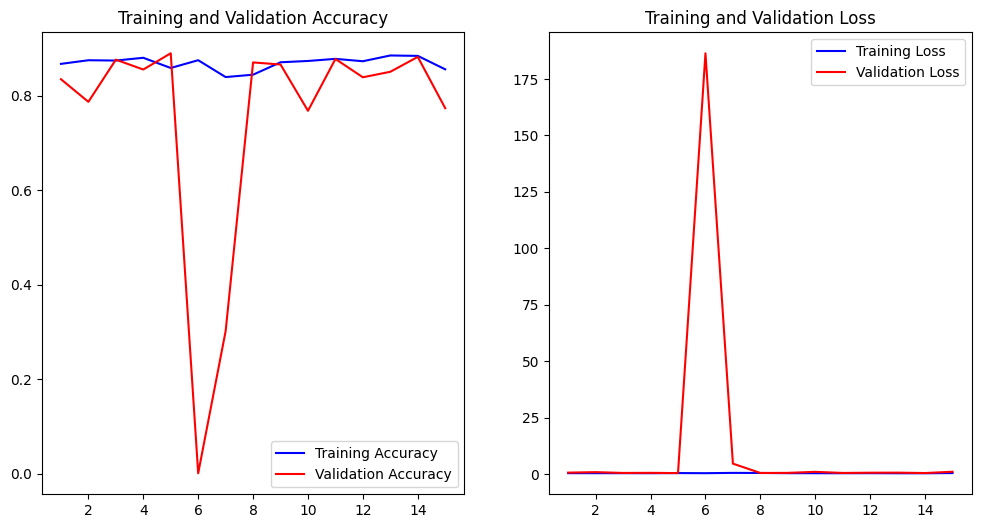

In [33]:
#Plot training & validation accuracy and loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
# import numpy as np
# import pickle
# import cv2
# import os
# import sys
# from keras import optimizers
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Lambda
# from keras.utils import to_categorical
# from keras.callbacks import ModelCheckpoint
# from keras.optimizers import Adam
# import tensorflow as tf
# import matplotlib.pyplot as plt
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization, Activation
# from keras.optimizers import Adam

# #directory = '/content/drive/MyDrive/Folder/Extracted_Folder/Img'
# # Function to simulate `get_num_of_classes` if not provided
# def get_num_of_classes():
#     return 658  # Placeholder value, replace with actual function if needed

# # Custom LRN2D layer using Lambda
# def lrn2d(x, alpha=1e-4, beta=0.75, depth_radius=5, bias=1.0):
#     return tf.nn.local_response_normalization(x, depth_radius=depth_radius, bias=bias, alpha=alpha, beta=beta)

# # Assume image_x and image_y are defined
# image_x, image_y = 64, 64  # Placeholder values, replace with actual dimensions

# num_of_classes = get_num_of_classes()

# model1 = Sequential()

# model1.add(Conv2D(52, (3, 3), padding='same', input_shape=(image_x, image_y, 1)))
# model1.add(BatchNormalization())
# model1.add(Activation('relu'))
# model1.add(MaxPooling2D(pool_size=(2, 2)))

# model1.add(Conv2D(64, (3, 3), padding='same'))
# model1.add(BatchNormalization())
# model1.add(Activation('relu'))
# model1.add(MaxPooling2D(pool_size=(2, 2)))

# model1.add(Conv2D(128, (3, 3), padding='same'))
# model1.add(BatchNormalization())
# model1.add(Activation('relu'))
# model1.add(MaxPooling2D(pool_size=(2, 2)))

# model1.add(Flatten())
# model1.add(Dense(256))
# model1.add(BatchNormalization())
# model1.add(Activation('relu'))
# model1.add(Dropout(0.5))

# model1.add(Dense(num_of_classes, activation='softmax'))

# # Compile the model with the Adam optimizer
# model1.compile(loss='categorical_crossentropy', optimizer=Adam(
#     learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=['accuracy'])

# # Model summary
# model1.summary()

In [ ]:
# train_images = np.array(train_images)
# #train_labels = np.array(train_labels)

In [ ]:
# len(train_labels[0])

In [ ]:
# test_images = np.array(test_images)

In [ ]:
# history1= model1.fit(train_images,train_labels,epochs=50, batch_size=42, validation_data=(test_images, test_labels))

In [34]:
letters = {
    1:'ಅ',2:'ಆ',3:'ಇ',4:'ಈ',5:'ಉ',6:'ಊ',7:'ಋ',8:'ೠ',9:'ಎ',10:'ಏ',11:'ಐ',12:'ಒ',13:'ಓ',14:'ಔ',15:'ಅಂ',16:'ಅಃ',
    17: 'ಕ್', 18: 'ಕ', 19: 'ಕಾ', 20: 'ಕಿ', 21: 'ಕೀ', 22: 'ಕು', 23: 'ಕೂ',
    24: 'ಕೃ', 25: 'ಕೄ', 26: 'ಕೆ', 27: 'ಕೇ', 28: 'ಕೈ', 29: 'ಕೊ', 30: 'ಕೋ',
    31: 'ಕೌ', 32: 'ಕಂ', 33: 'ಕಃ',

    34: 'ಖ್', 35: 'ಖ', 36: 'ಖಾ', 37: 'ಖಿ', 38: 'ಖೀ', 39: 'ಖು', 40: 'ಖೂ',
    41: 'ಖೃ', 42: 'ಖೄ', 43: 'ಖೆ', 44: 'ಖೇ', 45: 'ಖೈ', 46: 'ಖೊ', 47: 'ಖೋ',
    48: 'ಖೌ', 49: 'ಖಂ', 50: 'ಖಃ',

    51: 'ಗ್', 52: 'ಗ', 53: 'ಗಾ', 54: 'ಗಿ', 55: 'ಗೀ', 56: 'ಗು', 57: 'ಗೂ',
    58: 'ಗೃ', 59: 'ಗೄ', 60: 'ಗೆ', 61: 'ಗೇ', 62: 'ಗೈ', 63: 'ಗೊ', 64: 'ಗೋ',
    65: 'ಗೌ', 66: 'ಗಂ', 67: 'ಗಃ',

    68: 'ಘ್', 69: 'ಘ', 70: 'ಘಾ', 71: 'ಘಿ', 72: 'ಘೀ', 73: 'ಘು', 74: 'ಘೂ',
    75: 'ಘೃ', 76: 'ಘೄ', 77: 'ಘೆ', 78: 'ಘೇ', 79: 'ಘೈ', 80: 'ಘೊ', 81: 'ಘೋ',
    82: 'ಘೌ', 83: 'ಘಂ', 84: 'ಘಃ',

    85: 'ಙ್', 86: 'ಙ', 87: 'ಙಾ', 88: 'ಙಿ', 89: 'ಙೀ', 90: 'ಙು', 91: 'ಙೂ',
    92: 'ಙೃ', 93: 'ಙೄ', 94: 'ಙೆ', 95: 'ಙೇ', 96: 'ಙೈ', 97: 'ಙೊ', 98: 'ಙೋ',
    99: 'ಙೌ', 100: 'ಙಂ', 101: 'ಙಃ',

    102: 'ಚ್', 103: 'ಚ', 104: 'ಚಾ', 105: 'ಚಿ', 106: 'ಚೀ', 107: 'ಚು', 108: 'ಚೂ',
    109: 'ಚೃ', 110: 'ಚೄ', 111: 'ಚೆ', 112: 'ಚೇ', 113: 'ಚೈ', 114: 'ಚೊ', 115: 'ಚೋ',
    116: 'ಚೌ', 117: 'ಚಂ', 118: 'ಚಃ',

    119: 'ಛ್', 120: 'ಛ', 121: 'ಛಾ', 122: 'ಛಿ', 123: 'ಛೀ', 124: 'ಛು', 125: 'ಛೂ',
    126: 'ಛೃ', 127: 'ಛೄ', 128: 'ಛೆ', 129: 'ಛೇ', 130: 'ಛೈ', 131: 'ಛೊ', 132: 'ಛೋ',
    133: 'ಛೌ', 134: 'ಛಂ', 135: 'ಛಃ',

    136: 'ಜ್', 137: 'ಜ', 138: 'ಜಾ', 139: 'ಜಿ', 140: 'ಜೀ', 141: 'ಜು', 142: 'ಜೂ',
    143: 'ಜೃ', 144: 'ಜೄ', 145: 'ಜೆ', 146: 'ಜೇ', 147: 'ಜೈ', 148: 'ಜೊ', 149: 'ಜೋ',
    150: 'ಜೌ', 151: 'ಜಂ', 152: 'ಜಃ',

    153: 'ಝ್', 154: 'ಝ', 155: 'ಝಾ', 156: 'ಝಿ', 157: 'ಝೀ', 158: 'ಝು', 159: 'ಝೂ',
    160: 'ಝೃ', 161: 'ಝೄ', 162: 'ಝೆ', 163: 'ಝೇ', 164: 'ಝೈ', 165: 'ಝೊ', 166: 'ಝೋ',
    167: 'ಝೌ', 168: 'ಝಂ', 169: 'ಝಃ',

    170: 'ಞ್', 171: 'ಞ', 172: 'ಞಾ', 173: 'ಞಿ', 174: 'ಞೀ', 175: 'ಞು', 176: 'ಞೂ',
    177: 'ಞೃ', 178: 'ಞೄ', 179: 'ಞೆ', 180: 'ಞೇ', 181: 'ಞೈ', 182: 'ಞೊ', 183: 'ಞೋ',
    184: 'ಞೌ', 185: 'ಞಂ', 186: 'ಞಃ',

    187: 'ಟ್', 188: 'ಟ', 189: 'ಟಾ', 190: 'ಟಿ', 191: 'ಟೀ', 192: 'ಟು', 193: 'ಟೂ',
    194: 'ಟೃ', 195: 'ಟೄ', 196: 'ಟೆ', 197: 'ಟೇ', 198: 'ಟೈ', 199: 'ಟೊ', 200: 'ಟೋ',
    201: 'ಟೌ', 202: 'ಟಂ', 203: 'ಟಃ',

    204: 'ಠ್', 205: 'ಠ', 206: 'ಠಾ', 207: 'ಠಿ', 208: 'ಠೀ', 209: 'ಠು', 210: 'ಠೂ',
    211: 'ಠೃ', 212: 'ಠೄ', 213: 'ಠೆ', 214: 'ಠೇ', 215: 'ಠೈ', 216: 'ಠೊ', 217: 'ಠೋ',
    218: 'ಠೌ', 219: 'ಠಂ', 220: 'ಠಃ',

    221: 'ಡ್', 222: 'ಡ', 223: 'ಡಾ', 224: 'ಡಿ', 225: 'ಡೀ', 226: 'ಡು', 227: 'ಡೂ',
    228: 'ಡೃ', 229: 'ಡೄ', 230: 'ಡೆ', 231: 'ಡೇ', 232: 'ಡೈ', 233: 'ಡೊ', 234: 'ಡೋ',
    235: 'ಡೌ', 236: 'ಡಂ', 237: 'ಡಃ',

    238: 'ಢ್', 239: 'ಢ', 240: 'ಢಾ', 241: 'ಢಿ', 242: 'ಢೀ', 243: 'ಢು', 244: 'ಢೂ',
    245: 'ಢೃ', 246: 'ಢೄ', 247: 'ಢೆ', 248: 'ಢೇ', 249: 'ಢೈ', 250: 'ಢೊ', 251: 'ಢೋ',
    252: 'ಢೌ', 253: 'ಢಂ', 254: 'ಢಃ',

    255: 'ಣ್', 256: 'ಣ', 257: 'ಣಾ', 258: 'ಣಿ', 259: 'ಣೀ', 260: 'ಣು', 261: 'ಣೂ',
    262: 'ಣೃ', 263: 'ಣೄ', 264: 'ಣೆ', 265: 'ಣೇ', 266: 'ಣೈ', 267: 'ಣೊ', 268: 'ಣೋ',
    269: 'ಣೌ', 270: 'ಣಂ', 271: 'ಣಃ',

    272: 'ತ್', 273: 'ತ', 274: 'ತಾ', 275: 'ತಿ', 276: 'ತೀ', 277: 'ತು', 278: 'ತೂ',
    279: 'ತೃ', 280: 'ತೄ', 281: 'ತೆ', 282: 'ತೇ', 283: 'ತೈ', 284: 'ತೊ', 285: 'ತೋ',
    286: 'ತೌ', 287: 'ತಂ', 288: 'ತಃ',

    289: 'ಥ್', 290: 'ಥ', 291: 'ಥಾ', 292: 'ಥಿ', 293: 'ಥೀ', 294: 'ಥು', 295: 'ಥೂ',
    296: 'ಥೃ', 297: 'ಥೄ', 298: 'ಥೆ', 299: 'ಥೇ', 300: 'ಥೈ', 301: 'ಥೊ', 302: 'ಥೋ',
    303: 'ಥೌ', 304: 'ಥಂ', 305: 'ಥಃ',

    306: 'ದ್', 307: 'ದ', 308: 'ದಾ', 309: 'ದಿ', 310: 'ದೀ', 311: 'ದು', 312: 'ದೂ',
    313: 'ದೃ', 314: 'ದೄ', 315: 'ದೆ', 316: 'ದೇ', 317: 'ದೈ', 318: 'ದೊ', 319: 'ದೋ',
    320: 'ದೌ', 321: 'ದಂ', 322: 'ದಃ',

    323: 'ಧ್', 324: 'ಧ', 325: 'ಧಾ', 326: 'ಧಿ', 327: 'ಧೀ', 328: 'ಧು', 329: 'ಧೂ',
    330: 'ಧೃ', 331: 'ಧೄ', 332: 'ಧೆ', 333: 'ಧೇ', 334: 'ಧೈ', 335: 'ಧೊ', 336: 'ಧೋ',
    337: 'ಧೌ', 338: 'ಧಂ', 339: 'ಧಃ',

    340: 'ನ್', 341: 'ನ', 342: 'ನಾ', 343: 'ನಿ', 344: 'ನೀ', 345: 'ನು', 346: 'ನೂ',
    347: 'ನೃ', 348: 'ನೄ', 349: 'ನೆ', 350: 'ನೇ', 351: 'ನೈ', 352: 'ನೊ', 353: 'ನೋ',
    354: 'ನೌ', 355: 'ನಂ', 356: 'ನಃ',

    357: 'ಪ್', 358: 'ಪ', 359: 'ಪಾ', 360: 'ಪಿ', 361: 'ಪೀ', 362: 'ಪು', 363: 'ಪೂ',
    364: 'ಪೃ', 365: 'ಪೄ', 366: 'ಪೆ', 367: 'ಪೇ', 368: 'ಪೈ', 369: 'ಪೊ', 370: 'ಪೋ',
    371: 'ಪೌ', 372: 'ಪಂ', 373: 'ಪಃ',

    374: 'ಫ್', 375: 'ಫ', 376: 'ಫಾ', 377: 'ಫಿ', 378: 'ಫೀ', 379: 'ಫು', 380: 'ಫೂ',
    381: 'ಫೃ', 382: 'ಫೄ', 383: 'ಫೆ', 384: 'ಫೇ', 385: 'ಫೈ', 386: 'ಫೊ', 387: 'ಫೋ',
    388: 'ಫೌ', 389: 'ಫಂ', 390: 'ಫಃ',

    391: 'ಬ್', 392: 'ಬ', 393: 'ಬಾ', 394: 'ಬಿ', 395: 'ಬೀ', 396: 'ಬು', 397: 'ಬೂ',
    398: 'ಬೃ', 399: 'ಬೄ', 400: 'ಬೆ', 401: 'ಬೇ', 402: 'ಬೈ', 403: 'ಬೊ',
    404: 'ಬೋ', 405: 'ಬೌ', 406: 'ಬಂ', 407: 'ಬಃ',

    408: 'ಭ್', 409: 'ಭ', 410: 'ಭಾ', 411: 'ಭಿ', 412: 'ಭೀ', 413: 'ಭು', 414: 'ಭೂ',
    415: 'ಭೃ', 416: 'ಭೄ', 417: 'ಭೆ', 418: 'ಭೇ', 419: 'ಭೈ', 420: 'ಭೊ', 421: 'ಭೋ',
    422: 'ಭೌ', 423: 'ಭಂ', 424: 'ಭಃ',

    425: 'ಮ್', 426: 'ಮ', 427: 'ಮಾ', 428: 'ಮಿ', 429: 'ಮೀ', 430: 'ಮು', 431: 'ಮೂ',
    432: 'ಮೃ', 433: 'ಮೄ', 434: 'ಮೆ', 435: 'ಮೇ', 436: 'ಮೈ', 437: 'ಮೊ', 438: 'ಮೋ',
    439: 'ಮೌ', 440:'ಮಂ', 441:'ಮಃ', 442: "ಯ್", 443: "ಯ", 444: "ಯಾ", 445: "ಯಿ", 446: "ಯೀ", 447: "ಯು", 448: "ಯೂ", 449: "ಯೃ", 450: "ಯೄ", 451: "ಯೆ",
    452: "ಯೇ", 453: "ಯೈ", 454: "ಯೊ", 455: "ಯೋ", 456: "ಯೌ", 457: "ಯಂ", 458: "ಯಃ",
    459: "ರ್", 460: "ರ", 461: "ರಾ", 462: "ರಿ", 463: "ರೀ", 464: "ರು", 465: "ರೂ", 466: "ರೃ", 467: "ರೄ", 468: "ರೆ",
    469: "ರೇ", 470: "ರೈ", 471: "ರೊ", 472: "ರೋ", 473: "ರೌ", 474: "ರಂ", 475: "ರಃ",
    476: "ೞ್", 477: "ೞ", 478: "ೞಾ", 479: "ೞಿ", 480: "ೞೀ", 481: "ೞು", 482: "ೞೂ", 483: "ೞೃ", 484: "ೞೄ", 485: "ೞೆ",
    486: "ೞೇ", 487: "ೞೈ", 488: "ೞೊ", 489: "ೞೋ", 490: "ೞೌ", 491: "ೞಂ", 492: "ೞಃ",493: "ಲ್", 494: "ಲ", 495: "ಲಾ", 496: "ಲಿ", 497: "ಲೀ", 498: "ಲು", 499: "ಲೂ", 500: "ಲೃ", 501: "ಲೄ", 502: "ಲೆ",
    503: "ಲೇ", 504: "ಲೈ", 505: "ಲೊ", 506: "ಲೋ", 507: "ಲೌ", 508: "ಲಂ", 509: "ಲಃ",510: "ಳ್", 511: "ಳ", 512: "ಳಾ", 513: "ಳಿ", 514: "ಳೀ", 515: "ಳು", 516: "ಳೂ", 517: "ಳೃ", 518: "ಳೄ", 519: "ಳೆ",
    520: "ಳೇ", 521: "ಳೈ", 522: "ಳೊ", 523: "ಳೋ", 524: "ಳೌ", 525: "ಳಂ", 526: "ಳಃ",527: "ೞ್", 528: "ೞ", 529: "ೞಾ", 530: "ೞಿ", 531: "ೞೀ", 532: "ೞು", 533: "ೞೂ", 534: "ೞೃ", 535: "ೞೄ", 536: "ೞೆ",
    537: "ೞೇ", 538: "ೞೈ", 539: "ೞೊ", 540: "ೞೋ", 541: "ೞೌ", 542: "ೞಂ", 543: "ೞಃ",544: "ವ್", 545: "ವ", 546: "ವಾ", 547: "ವಿ", 548: "ವೀ", 549: "ವು", 550: "ವೂ", 551: "ವೃ", 552: "ವೄ", 553: "ವೆ",
    554: "ವೇ", 555: "ವೈ", 556: "ವೊ", 557: "ವೋ", 558: "ವೌ", 559: "ವಂ", 560: "ವಃ",561: "ಶ್", 562: "ಶ", 563: "ಶಾ", 564: "ಶಿ", 565: "ಶೀ", 566: "ಶು", 567: "ಶೂ", 568: "ಶೃ", 569: "ಶೄ", 570: "ಶೆ",
    571: "ಶೇ", 572: "ಶೈ", 573: "ಶೊ", 574: "ಶೋ", 575: "ಶೌ", 576: "ಶಂ", 577: "ಶಃ",578: "ಷ್", 579: "ಷ", 580: "ಷಾ", 581: "ಷಿ", 582: "ಷೀ", 583: "ಷು", 584: "ಷೂ", 585: "ಷೃ", 586: "ಷೄ", 587: "ಷೆ",
    588: "ಷೇ", 589: "ಷೈ", 590: "ಷೊ", 591: "ಷೋ", 592: "ಷೌ", 593:"ಷಂ", 594:"ಷಃ",
    595: "ಸ್",
596: "ಸ",
597: "ಸಾ",
598: "ಸಿ",
599: "ಸೀ",
600: "ಸು",
601: "ಸೂ",
602: "ಸೃ",
603: "ಸೄ",
604: "ಸೆ",
605: "ಸೇ",
606: "ಸೈ",
607: "ಸೊ",
608: "ಸೋ",
609: "ಸೌ",
610: "ಸಂ",
611: "ಸಃ",
612: "ಹ್",
    613: "ಹ",
    614: "ಹಾ",
    615: "ಹಿ",
    616: "ಹೀ",
    617: "ಹು",
    618: "ಹೂ",
    619: "ಹೃ",
    620: "ಹೄ",
    621: "ಹೆ",
    622: "ಹೇ",
    623: "ಹೈ",
    624: "ಹೊ",
    625: "ಹೋ",
    626: "ಹೌ",
    627: "ಹಂ",
    628: "ಹಃ",
    629: "ಕ್ಷ್",
    630: "ಕ್ಷ",
    631: "ಕ್ಷಾ",
    632: "ಕ್ಷಿ",
    633: "ಕ್ಷೀ",
    634: "ಕ್ಷು",
    635: "ಕ್ಷೂ",
    636: "ಕ್ಷೃ",
    637: "ಕ್ಷೄ",
    638: "ಕ್ಷೆ",
    639: "ಕ್ಷೇ",
    640: "ಕ್ಷೈ",
    641: "ಕ್ಷೊ",
    642: "ಕ್ಷೋ",
    643: "ಕ್ಷೌ",
    644: "ಕ್ಷಂ",
    645: "ಕ್ಷಃ"
}


1/1 [==============================] - 0s 303ms/step
[11]
Predicted OutPut
ಐ
Input



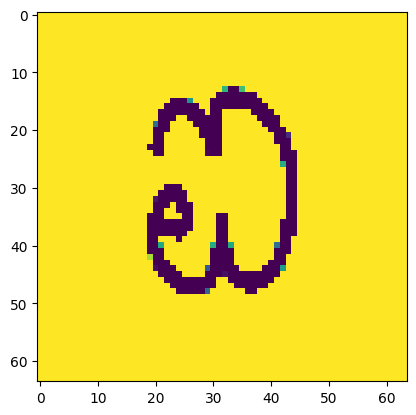

In [35]:
import matplotlib.pyplot as plt
plt.imshow(test_images[1])
x = model1.predict(np.expand_dims(test_images[1], axis=0))
numerical_labels = np.argmax(x, axis=1)
print(numerical_labels)
print("Predicted OutPut")
print(letters[numerical_labels[0]])
print("Input\n")
#print(letters(numerical_labels[0]))

In [36]:
print(letters[numerical_labels[0]])

ಐ


In [37]:
x = model1.predict(np.expand_dims(test_images[1], axis=0))

1/1 [==============================] - 0s 17ms/step


In [38]:

print(numerical_labels)

[11]


In [42]:
scores = model1.evaluate(test_images, test_labels, verbose=0)
print(scores)

[0.4281059503555298, 0.8902706503868103]


In [45]:
# from keras.optimizers import SGD
# from keras.layers import Input, ZeroPadding2D
# from keras.layers import Dense, Dropout, Activation
# from keras.layers import Conv2D
# from keras.layers import AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D
# from keras.layers import BatchNormalization
# from keras.models import Model
# import keras.backend as K
# from keras.layers import concatenate
# #from custom_layers import Scale

# def dense_block(x, stage, nb_layers, nb_filter, growth_rate, dropout_rate=None, weight_decay=1e-4):
#     """ Build a dense_block where the output of each conv_block is fed to subsequent ones
#     """
#     concat_axis = 3
#     feature_list = [x]

#     for i in range(nb_layers):
#         branch = conv_block(x, stage, i, growth_rate, dropout_rate, weight_decay)
#         feature_list.append(branch)
#         x = concatenate([x, branch], axis=concat_axis)
#         nb_filter += growth_rate

#     return x, nb_filter

# def conv_block(x, stage, branch, growth_rate, dropout_rate=None, weight_decay=1e-4):
#     """ Apply BatchNorm, Relu, 3x3 Conv2D, optional dropout
#     """
#     concat_axis = 3
#     eps = 1.1e-5

#     conv_name_base = 'conv' + str(stage) + '_' + str(branch)
#     relu_name_base = 'relu' + str(stage) + '_' + str(branch)
#     bn_name_base = 'bn' + str(stage) + '_' + str(branch)

#     x = BatchNormalization(epsilon=eps, axis=concat_axis, name=bn_name_base+'_x1')(x)
#     x = BatchNormalization(axis=concat_axis, name='scale'+str(stage)+'_'+str(branch)+'_x1')(x)
#     x = Activation('relu', name=relu_name_base+'_x1')(x)
#     x = Conv2D(growth_rate, (3, 3), padding='same', name=conv_name_base+'_x1', use_bias=False)(x)

#     if dropout_rate:
#         x = Dropout(dropout_rate)(x)

#     return x

# def transition_block(x, stage, nb_filter, dropout_rate=None, weight_decay=1e-4):
#     """ Apply BatchNorm, 1x1 Convolution, averagePooling, optional Dropout
#     """
#     concat_axis = 3
#     eps = 1.1e-5

#     conv_name_base = 'conv' + str(stage) + '_blk'
#     bn_name_base = 'bn' + str(stage) + '_blk'
#     relu_name_base = 'relu' + str(stage) + '_blk'

#     x = BatchNormalization(epsilon=eps, axis=concat_axis, name=bn_name_base)(x)
#     x = BatchNormalization(axis=concat_axis, name='scale'+str(stage)+'_blk')(x)
#     x = Activation('relu', name=relu_name_base)(x)
#     x = Conv2D(nb_filter, (1, 1), padding='same', name=conv_name_base, use_bias=False)(x)

#     if dropout_rate:
#         x = Dropout(dropout_rate)(x)

#     x = AveragePooling2D((2, 2), strides=(2, 2))(x)

#     return x

# def densenet121_model(img_rows, img_cols, color_type=1, nb_dense_block=4, growth_rate=32, nb_filter=64, reduction=0.5, dropout_rate=0.0, weight_decay=1e-4, num_classes=None):
#     '''
#     DenseNet 121 Model for Keras
#         A Keras model instance.
#     '''

#     # Handle Dimension Ordering for different backends
#     global concat_axis
#     img_input = Input(shape=(img_rows, img_cols, color_type), name='data')
#     concat_axis = 3

#     # From architecture for ImageNet (Table 1 in the paper)
#     nb_filter = 64
#     nb_layers = [6,12,24,16] # For DenseNet-121

#     # Initial convolution
#     x = Conv2D(nb_filter, (7, 7), strides=(2, 2), padding='same', name='conv1', use_bias=False)(img_input)
#     x = BatchNormalization(axis=concat_axis, name='bn_conv1')(x)
#     x = BatchNormalization(axis=concat_axis, name='scale_final')(x)
#     x = Activation('relu', name='relu_conv1')(x)
#     x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='pool1')(x)

#     # Add dense blocks
#     for block_idx in range(nb_dense_block - 1):
#         stage = block_idx + 2
#         x, nb_filter = dense_block(x, stage, nb_layers[block_idx], nb_filter, growth_rate, dropout_rate=dropout_rate)

#         # Add transition_block
#         x = transition_block(x, stage, nb_filter, dropout_rate=dropout_rate)
#         nb_filter = int(nb_filter * reduction)

#     final_stage = stage + 1
#     x, nb_filter = dense_block(x, final_stage, nb_layers[-1], nb_filter, growth_rate, dropout_rate=dropout_rate)

#     x = BatchNormalization(axis=concat_axis, name='bn_final')(x)
#     x = BatchNormalization(axis=concat_axis, name='scale_final_2')(x)
#     x = Activation('relu', name='relu_final')(x)

#     x_fc = GlobalAveragePooling2D(name='global_avg_pool')(x)
#     x_fc = Dense(num_classes, name='fc')(x_fc)
#     x_fc = Activation('softmax', name='softmax')(x_fc)

#     model = Model(img_input, x_fc)

#     # Learning rate is changed to 0.001
#     sgd = SGD(lr=1e-3, momentum=0.9, nesterov=True)
#     model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

#     return model

# # Example usage:
# img_rows, img_cols = 64, 64
# color_type = 1  # Grayscale images
# num_classes = 658  # Example number of classes

# model = densenet121_model(img_rows, img_cols, color_type=color_type, num_classes=num_classes)
# model.summary()


In [ ]:
# history = model.fit(train_images,train_labels,epochs=25, batch_size=42)

In [ ]:
#DenseNet Model

In [52]:
import numpy as np
from keras.optimizers import SGD
from keras.layers import Input, ZeroPadding2D, Dense, Dropout, Activation, Conv2D, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D, BatchNormalization, concatenate
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf

def dense_block(x, stage, nb_layers, nb_filter, growth_rate, dropout_rate=None, weight_decay=1e-4):
    concat_axis = 3
    feature_list = [x]

    for i in range(nb_layers):
        branch = conv_block(x, stage, i, growth_rate, dropout_rate, weight_decay)
        feature_list.append(branch)
        x = concatenate([x, branch], axis=concat_axis)
        nb_filter += growth_rate

    return x, nb_filter

def conv_block(x, stage, branch, growth_rate, dropout_rate=None, weight_decay=1e-4):
    concat_axis = 3
    eps = 1.1e-5

    conv_name_base = 'conv' + str(stage) + '_' + str(branch)
    relu_name_base = 'relu' + str(stage) + '_' + str(branch)
    bn_name_base = 'bn' + str(stage) + '_' + str(branch)

    x = BatchNormalization(epsilon=eps, axis=concat_axis, name=bn_name_base+'_x1')(x)
    x = Activation('relu', name=relu_name_base+'_x1')(x)
    x = Conv2D(growth_rate, (3, 3), padding='same', name=conv_name_base+'_x1', use_bias=False)(x)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    return x

def transition_block(x, stage, nb_filter, dropout_rate=None, weight_decay=1e-4):
    concat_axis = 3
    eps = 1.1e-5

    conv_name_base = 'conv' + str(stage) + '_blk'
    bn_name_base = 'bn' + str(stage) + '_blk'
    relu_name_base = 'relu' + str(stage) + '_blk'

    x = BatchNormalization(epsilon=eps, axis=concat_axis, name=bn_name_base)(x)
    x = Activation('relu', name=relu_name_base)(x)
    x = Conv2D(nb_filter, (1, 1), padding='same', name=conv_name_base, use_bias=False)(x)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    x = AveragePooling2D((2, 2), strides=(2, 2))(x)

    return x

def densenet121_model(img_rows, img_cols, color_type=1, nb_dense_block=4, growth_rate=32, nb_filter=64, reduction=0.5, dropout_rate=0.0, weight_decay=1e-4, num_classes=None):
    global concat_axis
    img_input = Input(shape=(img_rows, img_cols, color_type), name='data')
    concat_axis = 3

    nb_filter = 64
    nb_layers = [6,12,24,16]

    x = Conv2D(nb_filter, (7, 7), strides=(2, 2), padding='same', name='conv1', use_bias=False)(img_input)
    x = BatchNormalization(axis=concat_axis, name='bn_conv1')(x)
    x = Activation('relu', name='relu_conv1')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='pool1')(x)

    for block_idx in range(nb_dense_block - 1):
        stage = block_idx + 2
        x, nb_filter = dense_block(x, stage, nb_layers[block_idx], nb_filter, growth_rate, dropout_rate=dropout_rate)
        x = transition_block(x, stage, nb_filter, dropout_rate=dropout_rate)
        nb_filter = int(nb_filter * reduction)

    final_stage = stage + 1
    x, nb_filter = dense_block(x, final_stage, nb_layers[-1], nb_filter, growth_rate, dropout_rate=dropout_rate)

    x = BatchNormalization(axis=concat_axis, name='bn_final')(x)
    x = Activation('relu', name='relu_final')(x)

    x_fc = GlobalAveragePooling2D(name='global_avg_pool')(x)
    x_fc = Dense(num_classes, name='fc')(x_fc)
    x_fc = Activation('softmax', name='softmax')(x_fc)

    model = Model(img_input, x_fc)

    sgd = SGD(lr=1e-3, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

    return model

# Example usage:
img_rows, img_cols = 64, 64
color_type = 1
num_classes = 658

model = densenet121_model(img_rows, img_cols, color_type=color_type, num_classes=num_classes)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 32, 32, 64)           3136      ['data[0][0]']                
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 relu_conv1 (Activation)     (None, 32, 32, 64)           0         ['bn_conv1[0][0]']      

In [53]:
# Data preprocessing (normalization and reshaping)
train_images = np.array(train_images) / 255.0
test_images = np.array(test_images) / 255.0

train_images = train_images.reshape(-1, img_rows, img_cols, color_type)
test_images = test_images.reshape(-1, img_rows, img_cols, color_type)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_images)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Ensure the training and validation data are not empty
assert train_images.shape[0] > 0, "Training data is empty"
assert test_images.shape[0] > 0, "Validation data is empty"

In [54]:
# Train the model with validation data
history = model.fit(datagen.flow(train_images, train_labels, batch_size=42),
                    validation_data=(test_images, test_labels),
                    epochs=25,
                    callbacks=[reduce_lr, early_stop])

Epoch 1/25


326/326 [==============================] - 192s 563ms/step - loss: 6.1476 - accuracy: 0.0102 - val_loss: 1539.3154 - val_accuracy: 0.0011 - lr: 0.0100
Epoch 2/25
326/326 [==============================] - 170s 521ms/step - loss: 5.0423 - accuracy: 0.0419 - val_loss: 555.5714 - val_accuracy: 3.6576e-04 - lr: 0.0100
Epoch 3/25
326/326 [==============================] - 178s 546ms/step - loss: 3.8007 - accuracy: 0.1482 - val_loss: 73.6920 - val_accuracy: 0.0022 - lr: 0.0100
Epoch 4/25
326/326 [==============================] - 167s 513ms/step - loss: 2.6531 - accuracy: 0.3247 - val_loss: 11.9341 - val_accuracy: 0.0018 - lr: 0.0100
Epoch 5/25
326/326 [==============================] - 176s 539ms/step - loss: 1.8947 - accuracy: 0.4794 - val_loss: 162.4996 - val_accuracy: 0.0022 - lr: 0.0100
Epoch 6/25
326/326 [==============================] - 176s 541ms/step - loss: 1.4331 - accuracy: 0.5975 - val_loss: 141.5420 - val_accuracy: 0.0011 - lr: 0.0100
Epoch 7/25
326/326 [======================

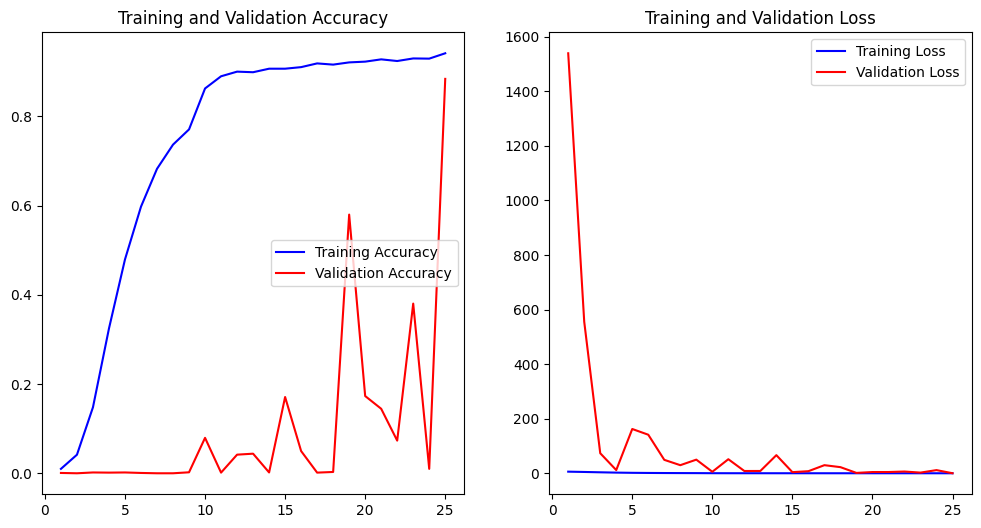

In [55]:
# Plot training & validation accuracy and loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
# # Plot training history: Loss
# plt.figure(figsize=(10, 5))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot training history: Accuracy
# plt.figure(figsize=(10, 5))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# # Assuming you want to use 20% of your training data for validation


# # Plot training history: Loss
# plt.figure(figsize=(10, 5))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')  # Now this should work
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

# # ... rest of your plotting code

In [56]:
scoresdn = model.evaluate(test_images, test_labels, verbose=0)

In [57]:
scoresdn

[0.40917155146598816, 0.883686900138855]

In [58]:
test_images[0].shape

(64, 64, 1)

In [59]:
np.expand_dims(test_images[0], axis=0).shape

(1, 64, 64, 1)

1/1 [==============================] - 2s 2s/step
ಳೀ


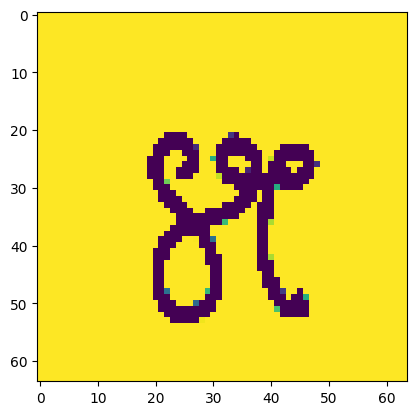

In [60]:
import matplotlib.pyplot as plt
plt.imshow(test_images[10])
x = model.predict(np.expand_dims(test_images[10], axis=0))
numerical_labels = np.argmax(x, axis=1)
print(letters[numerical_labels[0]])

In [64]:
x = model.predict(np.expand_dims(test_images[10], axis=0))

1/1 [==============================] - 1s 558ms/step


In [65]:
numerical_labels = np.argmax(x, axis=1)
print(numerical_labels)

[514]


In [66]:
print(letters[numerical_labels[0]])

ಳೀ


In [67]:
model1.save("cnn.keras")

In [68]:
model.save("densenet.keras")

In [69]:
cp "/content/cnn.keras" "/content/drive/MyDrive/mini_project"

In [70]:
cp "/content/densenet.keras" "/content/drive/MyDrive/mini_project"